In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = "/content/drive/My Drive/BA820 Unsupervised/"

childcare = pd.read_csv(file_path + "childcare_costs.csv")
counties = pd.read_csv(file_path + "counties.csv")

childcare.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [ ]:
counties.head()


,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
childcare = pd.read_csv(file_path + "childcare_costs.csv")
counties = pd.read_csv(file_path + "counties.csv")

print(childcare.shape)
print(counties.shape)


(34567, 61)
(3144, 4)


In [ ]:
#Joining County names
df = childcare.merge(counties, on="county_fips_code", how="left")

print(df.shape)
df[["county_fips_code", "county_name", "state_abbreviation", "study_year"]].head()

(34567, 64)


,county_fips_code,county_name,state_abbreviation,study_year
0,1001,Autauga County,AL,2008
1,1001,Autauga County,AL,2009
2,1001,Autauga County,AL,2010
3,1001,Autauga County,AL,2011
4,1001,Autauga County,AL,2012


In [ ]:
#checking missing values
missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate.head(20)


,0
mfccsa,0.323546
mfcc_preschool,0.323546
mfcc_infant,0.323546
mfcc_toddler,0.323546
mc_preschool,0.317470
mcsa,0.317470
mc_infant,0.317470
mc_toddler,0.317470
h_6to17_single_m,0.000058
h_under6_single_m,0.000058


In [ ]:
price_cols = ["mc_infant","mc_toddler","mc_preschool","mfcc_infant","mfcc_toddler","mfcc_preschool","mcsa","mfccsa"]
missing_rate[price_cols].sort_values(ascending=False)

,0
mfcc_infant,0.323546
mfccsa,0.323546
mfcc_preschool,0.323546
mfcc_toddler,0.323546
mc_preschool,0.317470
mc_toddler,0.317470
mc_infant,0.317470
mcsa,0.317470


# EDA Insight 1: Cost Measurement and Childcare Burden
We first assessed missingness across childcare price variables and found ~32% systematic missingness, particularly for family childcare prices. We are focusing more on the center based price columns since they serve as a reliable anchor for cost analysis.

We are also creating a feature named burden, which calculates the price of childcare relative to income.

In [ ]:
#defining filtered frames
#center based price price columns
core_price_cols = ["mc_infant", "mc_toddler", "mc_preschool"]

#All price columns
all_price_cols = ["mc_infant","mc_toddler","mc_preschool","mfcc_infant","mfcc_toddler","mfcc_preschool","mcsa","mfccsa"]
#keeping the columns where core childcare prices are present
df_prices = df.dropna(subset=core_price_cols).copy()

print("Original rows:", df.shape[0])
print("Rows with core center-based prices:", df_prices.shape[0])

Original rows: 34567
Rows with core center-based prices: 23593


In [ ]:
#burden calculation in terms of price relative to income
df_burden = df.dropna(subset=["mc_infant", "mhi_2018"]).copy()
print("Rows with mc_infant + mhi_2018:", df_burden.shape[0])

Rows with mc_infant + mhi_2018: 23593


# EDA Insight 2: Childcare Prices Alone Do Not Explain Mothers’ Workforce Participation

We examined scatter-plots for center-based infant prices and female labor force participation for mothers with children under 6 and for childeren between 6-17 and found out that for counties with low childcare prices, maternal workforce participation varies dramatically, while high-price counties tend to cluster around higher participation rates. This shows that in the counties where there is higher childcare costs, there is higher female labor participation.

We also found out that childcare price measures are strongly correlated with each other, meaning counties tend to be consistently high-cost or low-cost across ages. At the same time, childcare prices are strongly tied to county income and negatively related to poverty, which suggests that high prices often show up in higher-income counties

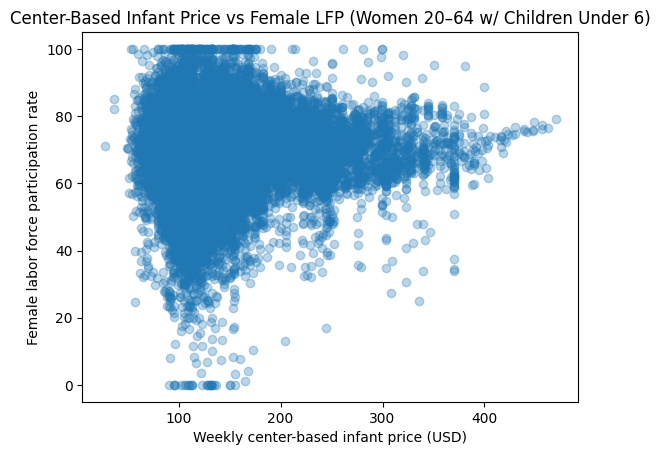

In [ ]:
x = df_prices["mc_infant"]
y = df_prices["flfpr_20to64_under6"]

mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], alpha=0.3)
plt.title("Center-Based Infant Price vs Female LFP (Women 20–64 w/ Children Under 6)")
plt.xlabel("Weekly center-based infant price (USD)")
plt.ylabel("Female labor force participation rate")
plt.show()


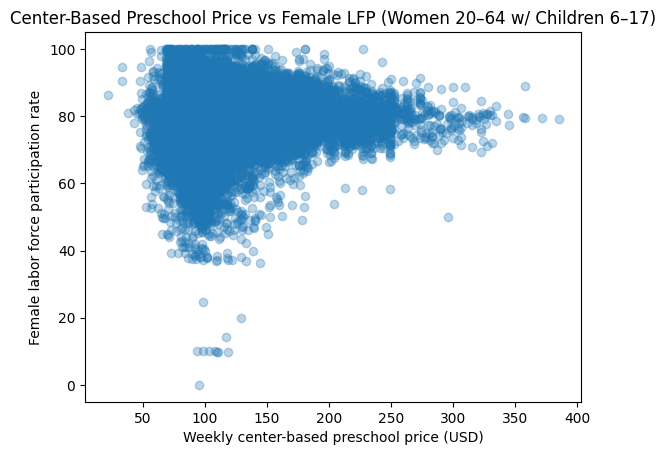

In [ ]:
# Same for women with children 6–17
x = df_prices["mc_preschool"]
y = df_prices["flfpr_20to64_6to17"]

mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], alpha=0.3)
plt.title("Center-Based Preschool Price vs Female LFP (Women 20–64 w/ Children 6–17)")
plt.xlabel("Weekly center-based preschool price (USD)")
plt.ylabel("Female labor force participation rate")
plt.show()

In [ ]:
# Correlation on the rows where core prices exist
eda_cols = [
    "mc_infant", "mc_toddler", "mc_preschool",
    "mfcc_infant", "mfcc_toddler", "mfcc_preschool",
    "flfpr_20to64", "flfpr_20to64_under6", "flfpr_20to64_6to17",
    "mlfpr_20to64", "mhi_2018", "pr_f", "pr_p"
]

corr = df_prices[eda_cols].corr(numeric_only=True)
corr.round(2)


,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,mlfpr_20to64,mhi_2018,pr_f,pr_p
mc_infant,1.00,0.96,0.96,0.91,0.90,0.90,0.30,0.10,0.12,0.22,0.60,-0.37,-0.35
mc_toddler,0.96,1.00,0.98,0.89,0.91,0.89,0.34,0.13,0.15,0.24,0.60,-0.39,-0.37
mc_preschool,0.96,0.98,1.00,0.90,0.90,0.90,0.33,0.12,0.13,0.24,0.62,-0.39,-0.37
mfcc_infant,0.91,0.89,0.90,1.00,0.97,0.96,0.28,0.08,0.11,0.21,0.60,-0.37,-0.35
mfcc_toddler,0.90,0.91,0.90,0.97,1.00,0.99,0.29,0.09,0.12,0.21,0.59,-0.37,-0.36
mfcc_preschool,0.90,0.89,0.90,0.96,0.99,1.00,0.29,0.09,0.12,0.22,0.60,-0.37,-0.36
flfpr_20to64,0.30,0.34,0.33,0.28,0.29,0.29,1.00,0.56,0.66,0.56,0.53,-0.62,-0.61
flfpr_20to64_under6,0.10,0.13,0.12,0.08,0.09,0.09,0.56,1.00,0.38,0.18,0.15,-0.26,-0.24
flfpr_20to64_6to17,0.12,0.15,0.13,0.11,0.12,0.12,0.66,0.38,1.00,0.33,0.28,-0.42,-0.40
mlfpr_20to64,0.22,0.24,0.24,0.21,0.21,0.22,0.56,0.18,0.33,1.00,0.52,-0.54,-0.56


# EDA Insight 3: Household structure varies a lot across counties

We converted household counts into shares of total households and found clear variation in family/work structure across counties. For households with children under 6, the median share is 6.9% for “both parents working” and 4.3% for “single mother” households. “Father-only working” households have a median of 3.8% but a very long right tail (max 72.7%), indicating extreme county-years. Overall, these spreads and tails suggest county family composition differs substantially and should be treated as a key dimension when defining county “types” and childcare pressure.

In [ ]:
under6_cols = ["h_under6_both_work", "h_under6_f_work", "h_under6_m_work", "h_under6_single_m"]
six17_cols  = ["h_6to17_both_work", "h_6to17_fwork", "h_6to17_mwork", "h_6to17_single_m"]

df_hh = df[["county_fips_code","study_year","households"] + under6_cols + six17_cols].copy()
for c in under6_cols + six17_cols:
    df_hh[c + "_share"] = df_hh[c] / df_hh["households"]
df_hh[[c + "_share" for c in under6_cols]].describe().T

,count,mean,std,min,25%,50%,75%,max
h_under6_both_work_share,34567.0,0.069792,0.025683,0.0,0.053077,0.067550,0.084243,0.355140
h_under6_f_work_share,34567.0,0.043318,0.026289,0.0,0.027571,0.038251,0.052596,0.727273
h_under6_m_work_share,34567.0,0.003673,0.004296,0.0,0.000868,0.002845,0.004837,0.065274
h_under6_single_m_share,34565.0,0.050092,0.030036,0.0,0.031200,0.044061,0.062105,0.371231


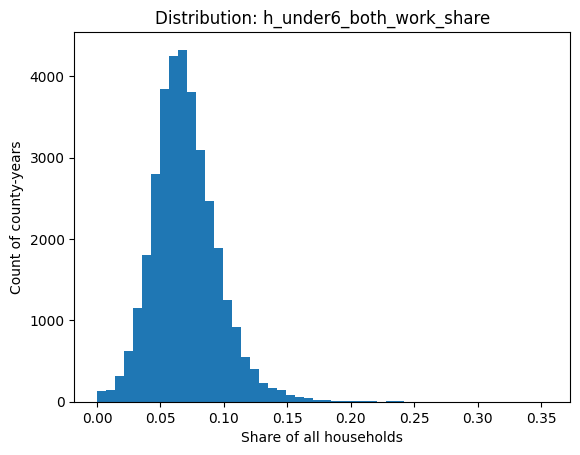

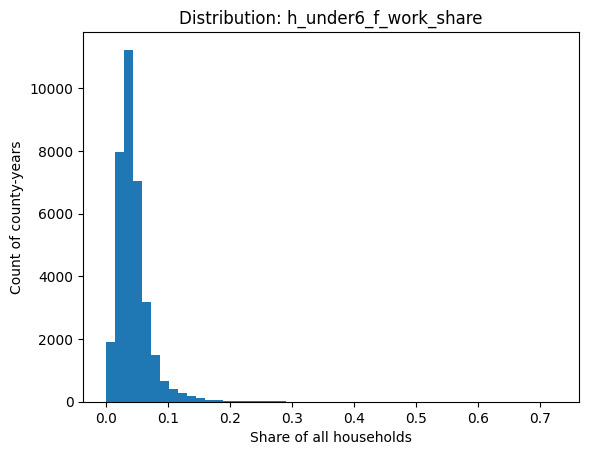

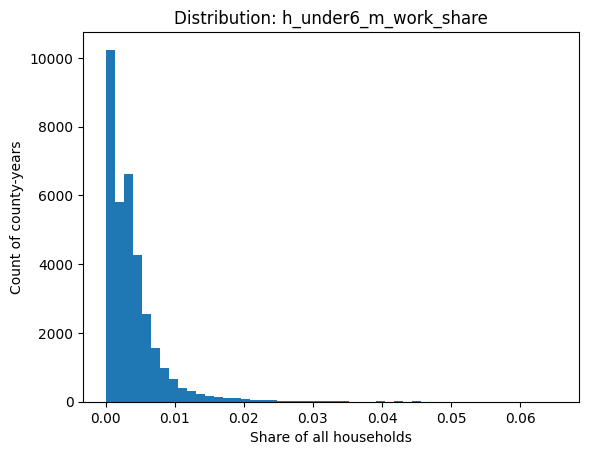

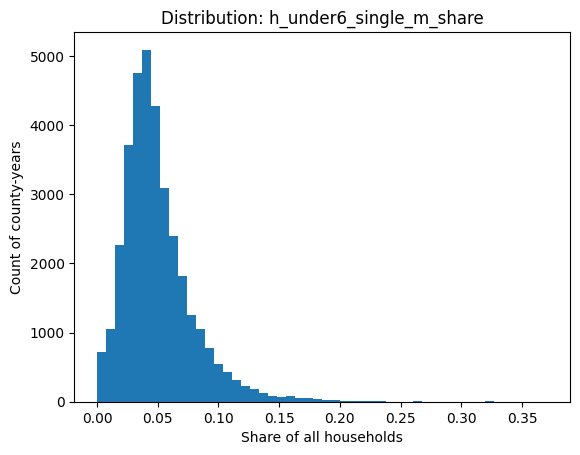

In [ ]:
# Distributions of shares (under 6)
for col in [c + "_share" for c in under6_cols]:
    s = df_hh[col].dropna()
    plt.figure()
    plt.hist(s, bins=50)
    plt.title(f"Distribution: {col}")
    plt.xlabel("Share of all households")
    plt.ylabel("Count of county-years")
    plt.show()

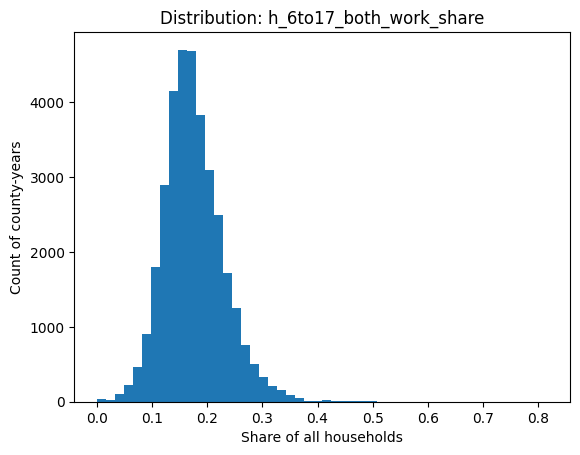

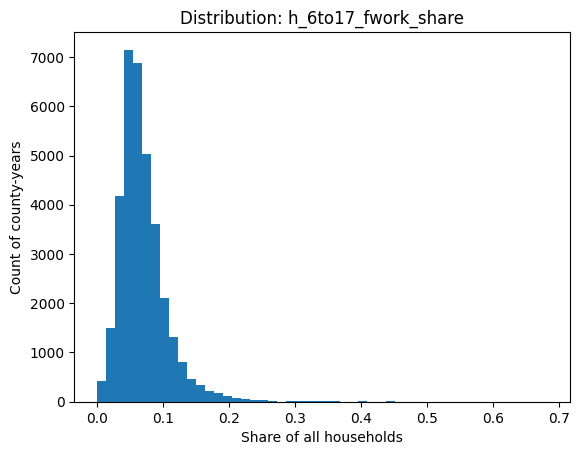

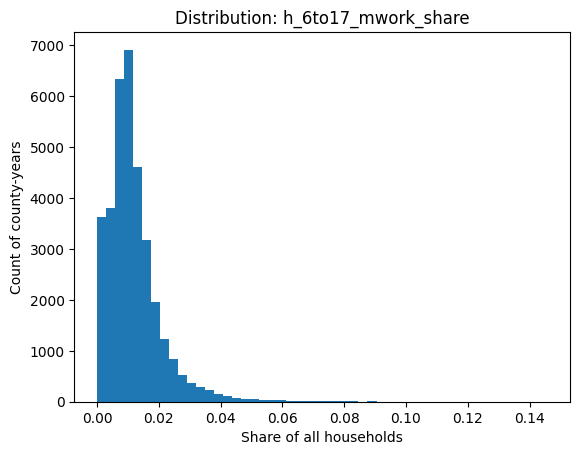

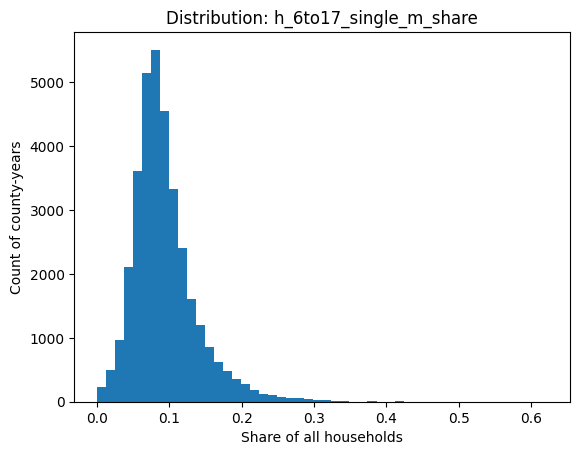

In [ ]:
# Distributions of shares (6–17)
for col in [c + "_share" for c in six17_cols]:
    s = df_hh[col].dropna()
    plt.figure()
    plt.hist(s, bins=50)
    plt.title(f"Distribution: {col}")
    plt.xlabel("Share of all households")
    plt.ylabel("Count of county-years")
    plt.show()

# EDA Insight 4: Burden shows affordability stress and extreme outliers

We created a burden metric by annualizing weekly center-based infant prices and dividing by median household income. The distribution shows that the typical county-year spends ~14.7% of income on infant childcare (IQR: 12.3%–17.3%), but the histogram has a long right tail with some county-years exceeding 40–50% of income. This confirms that while most counties fall into a moderate affordability range, a small set of counties experience extreme financial stress relative to income.

The top burden county-years illustrate this clearly. For example, Bronx County, NY (2018) shows a burden of 54.3%, and several Washington counties (e.g., Whitman, Ferry, Pacific, Okanogan, Pend Oreille) in 2014–2015 exceed 44–51%. These cases occur where relatively high childcare prices intersect with comparatively low household income.

This shows that raw childcare prices alone do not capture affordability. The burden measure highlights where childcare is financially overwhelming for families and motivates identifying “high-stress” county profiles and affordability outliers rather than focusing only on price levels.

In [ ]:
df_burden["infant_center_burden"] = (df_burden["mc_infant"] * 52) / df_burden["mhi_2018"]
df_burden["preschool_center_burden"] = (df_burden["mc_preschool"] * 52) / df_burden["mhi_2018"]

df_burden[["infant_center_burden","preschool_center_burden"]].describe()

,infant_center_burden,preschool_center_burden
count,23593.000000,23593.000000
mean,0.151830,0.127876
std,0.043230,0.031951
min,0.032709,0.025407
25%,0.122511,0.105892
50%,0.146516,0.124491
75%,0.173247,0.145850
max,0.543006,0.386522


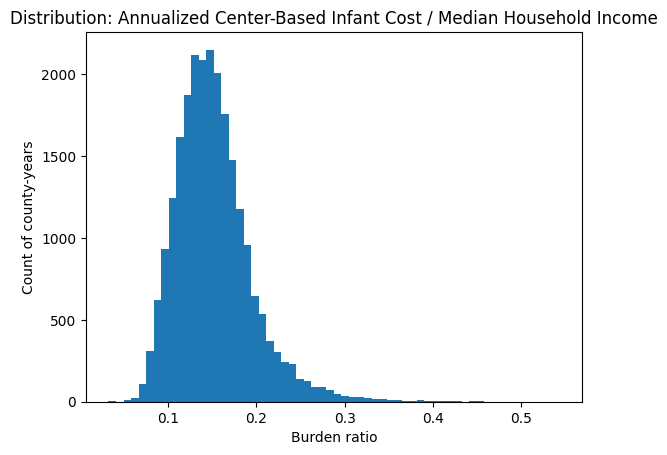

In [ ]:
# Histogram of burden
plt.figure()
plt.hist(df_burden["infant_center_burden"].dropna(), bins=60)
plt.title("Distribution: Annualized Center-Based Infant Cost / Median Household Income")
plt.xlabel("Burden ratio")
plt.ylabel("Count of county-years")
plt.show()

In [ ]:
# Top burden county-years (potential anomalies)
burden_view = df_burden[
    ["county_name","state_abbreviation","study_year","mc_infant","mhi_2018","infant_center_burden"]
].dropna().sort_values("infant_center_burden", ascending=False)

burden_view.head(20)

,county_name,state_abbreviation,study_year,mc_infant,mhi_2018,infant_center_burden
20139,Bronx County,NY,2018,397.70,38085.00,0.543006
32901,Whitman County,WA,2014,369.69,37712.68,0.509746
32593,Ferry County,WA,2014,369.69,39794.52,0.483079
32758,Pacific County,WA,2014,369.69,41783.08,0.460088
32747,Okanogan County,WA,2014,369.69,42044.90,0.457223
32769,Pend Oreille County,WA,2014,369.69,42474.20,0.452601
32759,Pacific County,WA,2015,339.29,39945.04,0.441684
32560,Columbia County,WA,2014,369.69,43535.26,0.441570
32902,Whitman County,WA,2015,322.96,38828.86,0.432511
32846,Stevens County,WA,2014,369.69,44637.66,0.430665


# EDA Insight 5: Occupation mix helps explain where burden, not just price, is high
We examined how occupation composition relates to both raw childcare prices and the burden measure. Center-based infant price is positively correlated with management/professional employment share (emp_m ≈ 0.45) and strongly with income (mhi_2018 ≈ 0.60), indicating that higher prices tend to appear in wealthier, professional-heavy counties. In contrast, the burden measure is most strongly associated with the service employment share (emp_service ≈ 0.33) and poverty (pr_p ≈ 0.27), while being slightly negatively related to income (≈ -0.16).

This shows an important distinction: some counties are expensive because they are wealthy, while others experience higher affordability stress because their labor market structure (e.g., more service jobs, lower incomes) makes childcare costs harder to bear. This suggests occupation mix is useful for identifying county profiles where childcare is financially stressful, not just where it is costly.

In [ ]:
occ_cols = ["emp_m", "emp_service", "emp_sales", "emp_n", "emp_p"]

# Quick correlation with burden
occ_corr_cols = occ_cols + ["infant_center_burden", "mc_infant", "mhi_2018", "pr_p"]
df_burden[occ_corr_cols].corr(numeric_only=True).round(2)

,emp_m,emp_service,emp_sales,emp_n,emp_p,infant_center_burden,mc_infant,mhi_2018,pr_p
emp_m,1.00,-0.28,-0.01,-0.42,-0.64,-0.01,0.45,0.62,-0.40
emp_service,-0.28,1.00,-0.05,-0.09,-0.22,0.33,0.00,-0.35,0.37
emp_sales,-0.01,-0.05,1.00,-0.41,-0.23,0.02,0.15,0.18,-0.10
emp_n,-0.42,-0.09,-0.41,1.00,0.02,-0.18,-0.35,-0.27,0.11
emp_p,-0.64,-0.22,-0.23,0.02,1.00,-0.07,-0.33,-0.38,0.19
infant_center_burden,-0.01,0.33,0.02,-0.18,-0.07,1.00,0.67,-0.16,0.27
mc_infant,0.45,0.00,0.15,-0.35,-0.33,0.67,1.00,0.60,-0.35
mhi_2018,0.62,-0.35,0.18,-0.27,-0.38,-0.16,0.60,1.00,-0.75
pr_p,-0.40,0.37,-0.10,0.11,0.19,0.27,-0.35,-0.75,1.00


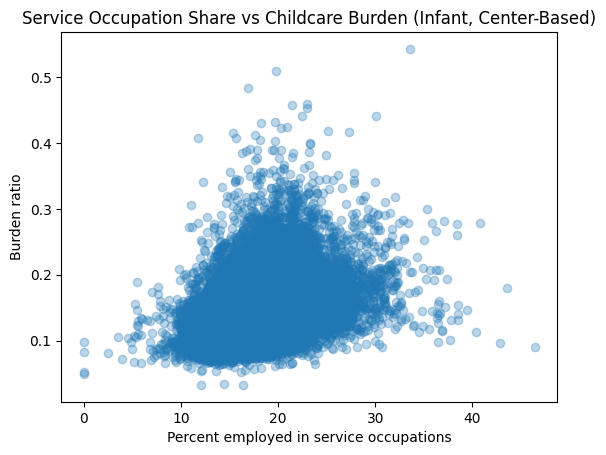

In [ ]:
# Simple scatter: service share vs burden (example)
x = df_burden["emp_service"]
y = df_burden["infant_center_burden"]
mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], alpha=0.3)
plt.title("Service Occupation Share vs Childcare Burden (Infant, Center-Based)")
plt.xlabel("Percent employed in service occupations")
plt.ylabel("Burden ratio")
plt.show()

# EDA Insight 6: Demographics relate more to income and price context than to burden
We examined how racial/ethnic composition relates to childcare price, income, poverty, and burden. Several demographic shares show stronger relationships with income and price than with affordability burden. For example, the Asian population share (one_race_a) is strongly correlated with both childcare price (0.55) and income (0.49), while the Black population share (one_race_b) is more strongly related to poverty (0.41) and negatively related to income (-0.22). In contrast, the correlations between demographic shares and the burden measure are relatively small (mostly between 0.02 and 0.20).

This suggests that demographic composition helps explain the socioeconomic context in which childcare prices occur, but does not directly explain where childcare is most unaffordable. Therefore, demographics are better suited for profiling and interpreting county types rather than serving as primary predictors of affordability stress.

In [ ]:
demo_cols = ["one_race_w","one_race_b","one_race_a","one_race_i","one_race_h","one_race_other","two_races","hispanic"]

demo_corr_cols = demo_cols + ["infant_center_burden", "mc_infant", "mhi_2018", "pr_p"]
df_burden[demo_corr_cols].corr(numeric_only=True).round(2)

,one_race_w,one_race_b,one_race_a,one_race_i,one_race_h,one_race_other,two_races,hispanic,infant_center_burden,mc_infant,mhi_2018,pr_p
one_race_w,1.00,-0.82,-0.25,-0.35,-0.11,-0.23,-0.21,-0.10,-0.11,-0.01,0.12,-0.46
one_race_b,-0.82,1.00,0.02,-0.10,-0.05,-0.05,-0.11,-0.10,0.02,-0.15,-0.22,0.41
one_race_a,-0.25,0.02,1.00,-0.05,0.39,0.23,0.27,0.17,0.20,0.55,0.49,-0.17
one_race_i,-0.35,-0.10,-0.05,1.00,0.04,-0.03,0.26,-0.04,0.03,-0.05,-0.10,0.27
one_race_h,-0.11,-0.05,0.39,0.04,1.00,0.09,0.29,0.07,0.10,0.17,0.11,-0.04
one_race_other,-0.23,-0.05,0.23,-0.03,0.09,1.00,0.14,0.71,0.11,0.19,0.13,0.03
two_races,-0.21,-0.11,0.27,0.26,0.29,0.14,1.00,0.10,0.19,0.24,0.11,-0.00
hispanic,-0.10,-0.10,0.17,-0.04,0.07,0.71,0.10,1.00,0.07,0.10,0.07,0.10
infant_center_burden,-0.11,0.02,0.20,0.03,0.10,0.11,0.19,0.07,1.00,0.67,-0.16,0.27
mc_infant,-0.01,-0.15,0.55,-0.05,0.17,0.19,0.24,0.10,0.67,1.00,0.60,-0.35


# BA820 Project – Milestone 2 (Individual Submission)

**Student:** Tanmay Yenge  
**Dataset:** Childcare Cost  
**Focus:** Exploratory / Visual Similarity Analysis

> Note: This notebook builds on the team’s shared exploratory work from Milestone 1.  
> All sections labeled **“Milestone 2 – Individual Analysis (Tanmay)”** represent my personal analytical contributions for M2.


---

# Milestone 2 – Individual Analysis (Tanmay)

## Visual Similarity of Childcare Affordability Across Counties


In [ ]:
df.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool',
       'county_name', 'state_n

analysis 1

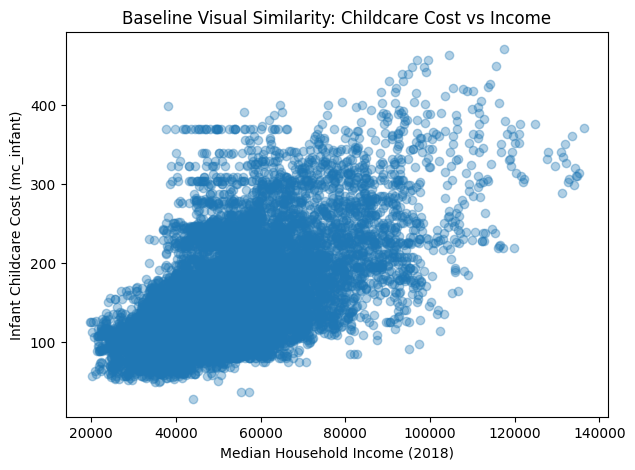

In [ ]:
import matplotlib.pyplot as plt

income_col = "mhi_2018"
cost_col = "mc_infant"   # main choice for M2

sub = df[[income_col, cost_col, "state_name", "county_name"]].dropna()

plt.figure(figsize=(7,5))
plt.scatter(sub[income_col], sub[cost_col], alpha=0.35)
plt.xlabel("Median Household Income (2018)")
plt.ylabel("Infant Childcare Cost (mc_infant)")
plt.title("Baseline Visual Similarity: Childcare Cost vs Income")
plt.show()

**Reflection:**  
The baseline visualization shows a strong positive association between income and childcare cost, but also substantial dispersion at nearly every income level. Counties with similar childcare costs often differ greatly in income, making it difficult to identify meaningful similarity using absolute cost alone. This result challenged my initial assumption that cost levels would naturally reveal comparable affordability patterns.


analysis 2

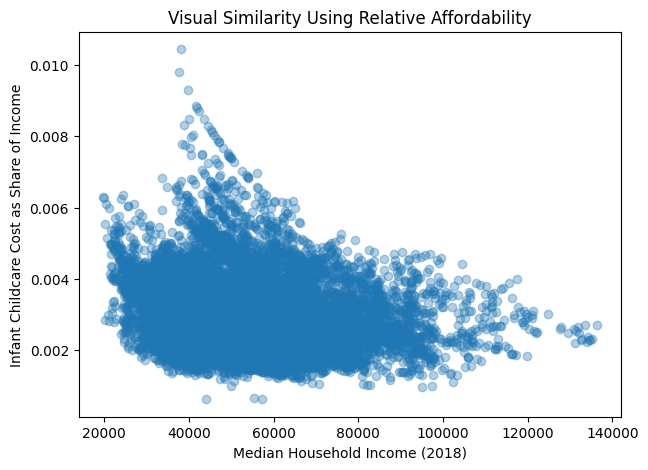

,affordability_ratio
count,23593.000000
mean,0.002920
std,0.000831
min,0.000629
25%,0.002356
50%,0.002818
75%,0.003332
max,0.010442


In [ ]:
sub = sub.copy()
sub["affordability_ratio"] = sub[cost_col] / sub[income_col]

plt.figure(figsize=(7,5))
plt.scatter(sub[income_col], sub["affordability_ratio"], alpha=0.35)
plt.xlabel("Median Household Income (2018)")
plt.ylabel("Infant Childcare Cost as Share of Income")
plt.title("Visual Similarity Using Relative Affordability")
plt.show()

sub["affordability_ratio"].describe()

**Reflection:**  
Expressing childcare cost as a share of household income reveals clearer structure in the data. Relative affordability highlights disparities that were obscured in the baseline plot, particularly among lower-income counties where the burden varies widely. This representation better aligns with how families experience childcare costs and provides a more meaningful basis for visual similarity analysis.


analysis 3


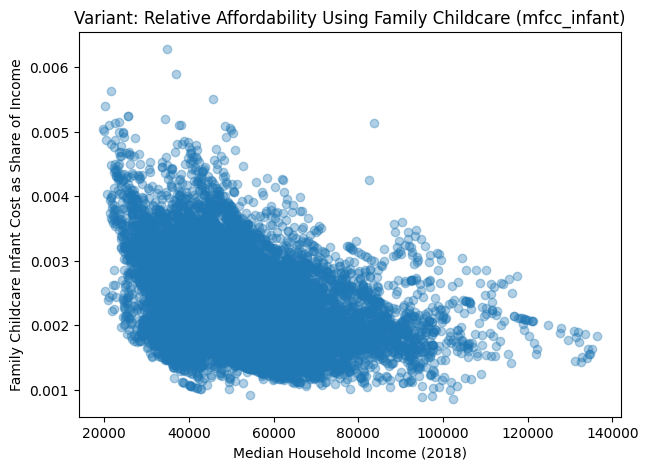

In [ ]:
cost_col_variant = "mfcc_infant"
sub2 = df[[income_col, cost_col_variant]].dropna().copy()
sub2["affordability_ratio_variant"] = sub2[cost_col_variant] / sub2[income_col]

plt.figure(figsize=(7,5))
plt.scatter(sub2[income_col], sub2["affordability_ratio_variant"], alpha=0.35)
plt.xlabel("Median Household Income (2018)")
plt.ylabel("Family Childcare Infant Cost as Share of Income")
plt.title("Variant: Relative Affordability Using Family Childcare (mfcc_infant)")
plt.show()

**Reflection (variant):**  
As a robustness check, I repeated the visual similarity analysis using family childcare infant costs instead of center-based costs. The resulting affordability visualization exhibited a similar overall structure, with relative burden decreasing as income increased. However, the spread of affordability ratios was narrower, and extreme burdens were less pronounced. This suggests that while the qualitative similarity patterns are stable across childcare settings, conclusions about affordability magnitude depend on the specific cost definition used. This comparison reinforced the importance of explicitly stating which childcare context is being analyzed.


analysis 4

In [ ]:
top = sub.sort_values("affordability_ratio", ascending=False).head(10)[
    ["county_name", "state_name", income_col, cost_col, "affordability_ratio"]
]
bottom = sub.sort_values("affordability_ratio", ascending=True).head(10)[
    ["county_name", "state_name", income_col, cost_col, "affordability_ratio"]
]

top, bottom

(               county_name  state_name  mhi_2018  mc_infant  \
 20139         Bronx County    New York  38085.00     397.70   
 32901       Whitman County  Washington  37712.68     369.69   
 32593         Ferry County  Washington  39794.52     369.69   
 32758       Pacific County  Washington  41783.08     369.69   
 32747      Okanogan County  Washington  42044.90     369.69   
 32769  Pend Oreille County  Washington  42474.20     369.69   
 32759       Pacific County  Washington  39945.04     339.29   
 32560      Columbia County  Washington  43535.26     369.69   
 32902       Whitman County  Washington  38828.86     322.96   
 32846       Stevens County  Washington  44637.66     369.69   
 
        affordability_ratio  
 20139             0.010442  
 32901             0.009803  
 32593             0.009290  
 32758             0.008848  
 32747             0.008793  
 32769             0.008704  
 32759             0.008494  
 32560             0.008492  
 32902             0.008